In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
dataset_path = "/content/drive/MyDrive/cat_dog dataset"

In [ ]:
num_cat_images = len(os.listdir(os.path.join(dataset_path, '/content/drive/MyDrive/cat_dog dataset/cat')))
num_dog_images = len(os.listdir(os.path.join(dataset_path, '/content/drive/MyDrive/cat_dog dataset/dog')))

In [ ]:
print("Number of cat images:", num_cat_images)
print("Number of dog images:", num_dog_images)

Number of cat images: 349
Number of dog images: 363


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
labels = ['Cat', 'Dog']
counts = [num_cat_images, num_dog_images]

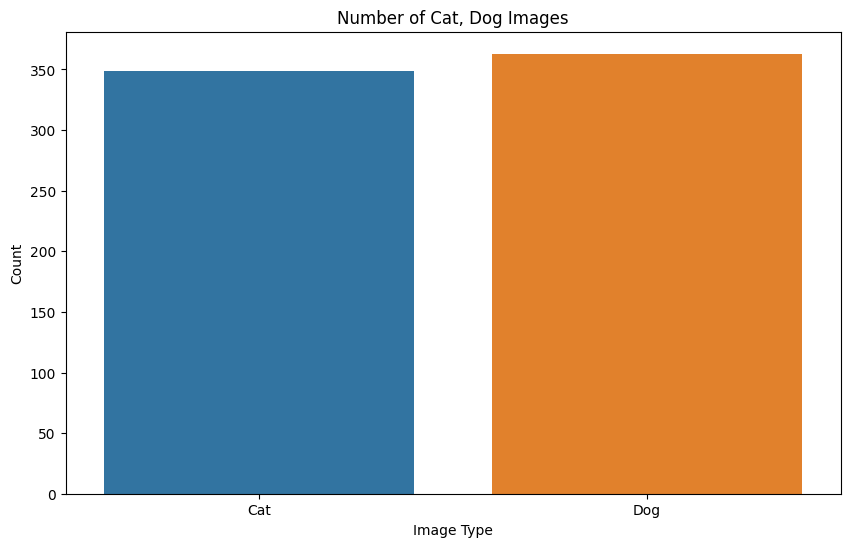

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Number of Cat, Dog Images')
plt.show()

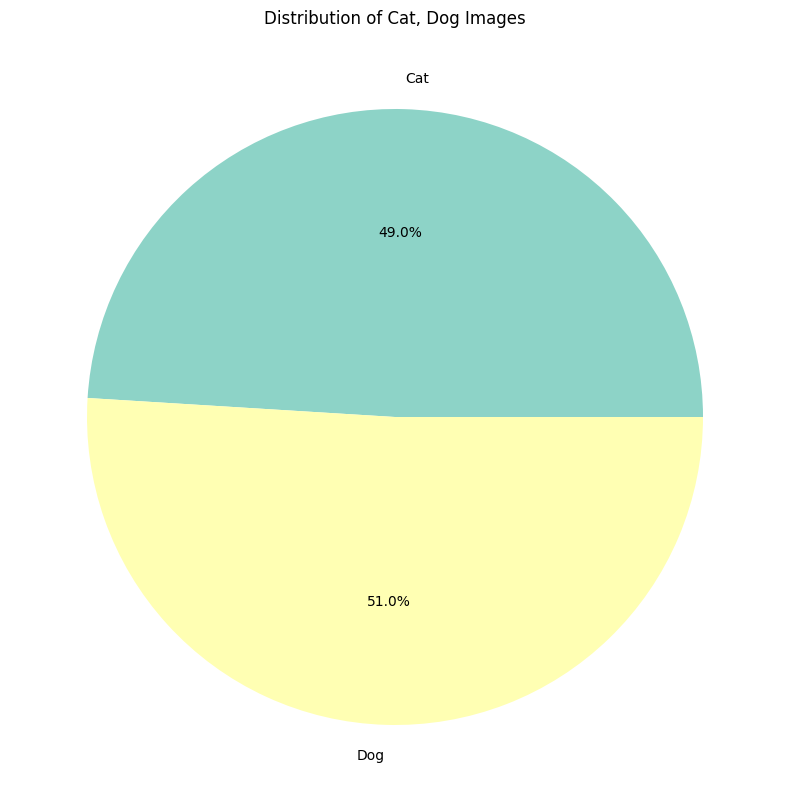

In [ ]:
plt.figure(figsize=(10, 10))
sns.set_palette("Set3")
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Cat, Dog Images')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(x=labels, y=counts)
fig.update_layout(
    xaxis_title='Image Type',
    yaxis_title='Count',
    title='Number of Cat, Dog Images',
    width=600,
    height=400
)
fig.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=counts, textinfo='percent',
                             insidetextorientation='radial')])
fig.update_layout(
    title='Distribution of Cat, Dog Images',
    width=800,
    height=500
)
fig.show()

In [ ]:
cat_path = os.path.join(dataset_path, '/content/drive/MyDrive/cat_dog dataset/cat')
dog_path = os.path.join(dataset_path, '/content/drive/MyDrive/cat_dog dataset/dog')

In [ ]:
cat_files = os.listdir(cat_path)

In [ ]:
import cv2

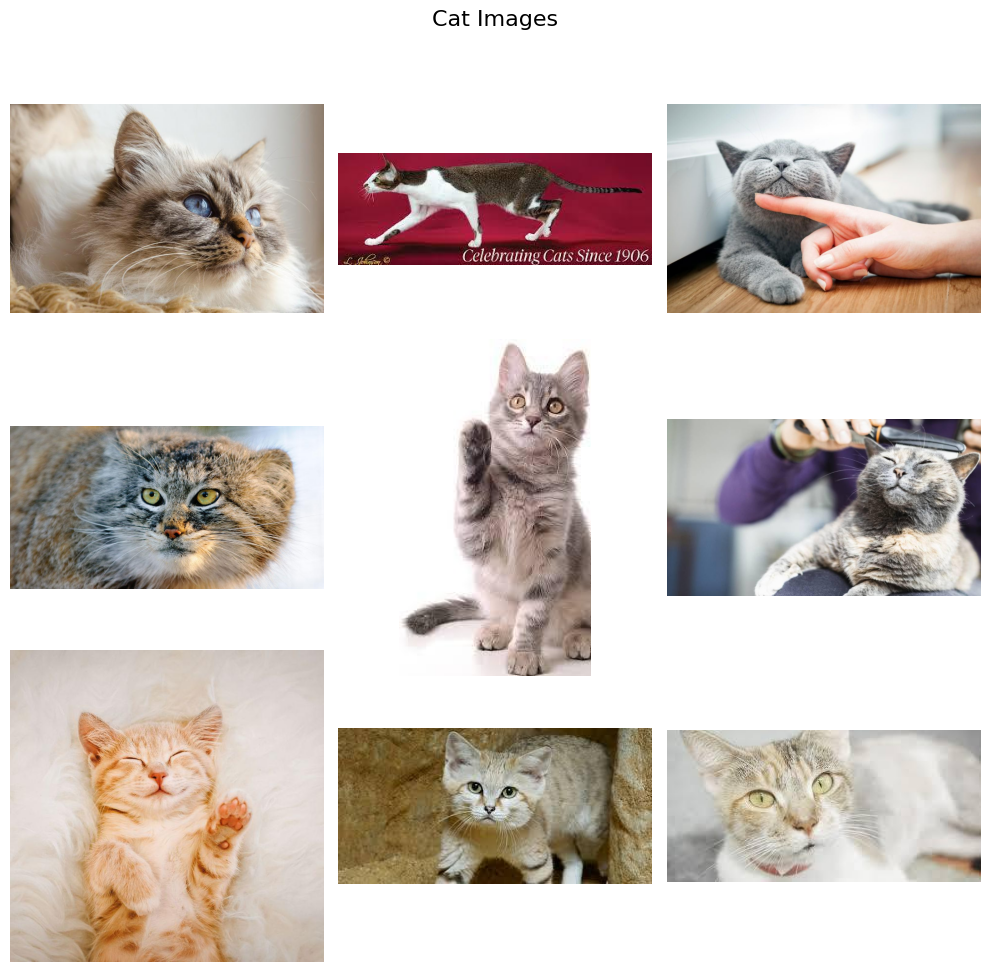

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Cat Images', fontsize=16)
axes = axes.ravel() # This line reshapes the 3x3 array of axes into a 1D array, making it easier to iterate over the subplots.

for i, image_file in enumerate(cat_files[:9]):
    image_path = os.path.join(cat_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
dog_files = os.listdir(dog_path)

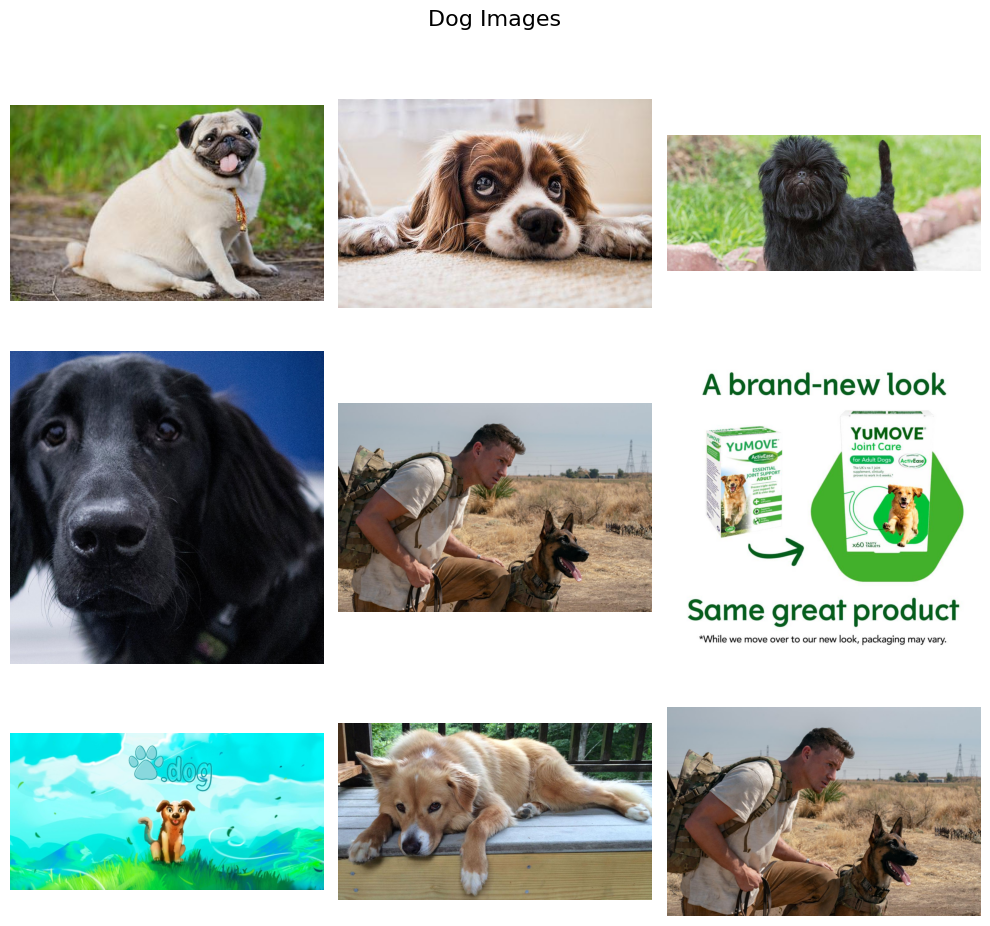

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Dog Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(dog_files[:9]):
    image_path = os.path.join(dog_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def load_and_preprocess_images(image_folder):
    image_files = os.listdir(image_folder)
    images = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            images.append(image)
    return images

In [ ]:
cat_files = load_and_preprocess_images(os.path.join(dataset_path, '/content/drive/MyDrive/cat_dog dataset/cat'))
dog_files = load_and_preprocess_images(os.path.join(dataset_path, '/content/drive/MyDrive/cat_dog dataset/dog'))

In [ ]:
import numpy as np

In [ ]:
cat_files = np.array(cat_files).reshape(-1, 256, 256, 3)
dog_files = np.array(dog_files).reshape(-1, 256, 256, 3)

In [ ]:
all_files = np.concatenate((cat_files, dog_files), axis=0)

In [ ]:
all_labels = np.concatenate((
    np.zeros(len(cat_files)),
    np.ones(len(dog_files)),
))

In [ ]:
all_files_flat = all_files.reshape(-1, all_files.shape[1] * all_files.shape[2] * all_files.shape[3])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
cat_files_new = all_files_flat[all_labels == 0].reshape(-1, 256, 256, 3)
dog_files_new = all_files_flat[all_labels == 1].reshape(-1, 256, 256, 3)

print("Resampled cat files shape:", cat_files_new.shape)
print("Resampled dog files shape:", dog_files_new.shape)

Resampled cat files shape: (349, 256, 256, 3)
Resampled dog files shape: (363, 256, 256, 3)


In [ ]:
image_shape = (256,256)

In [ ]:
X = np.concatenate((cat_files_new, dog_files_new))
y = np.concatenate(([0]*349, [1]*363))

In [ ]:
X_resized = np.array([cv2.resize(image, image_shape) for image in X])
X_flattened = X_resized.reshape(X_resized.shape[0], -1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y,
                                                    test_size=0.2,
                                                    stratify = y,
                                                    random_state=42)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.6283901764232925
Precision: 0.6324328361511906
Recall: 0.6293706293706294
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.64        70
           1       0.66      0.58      0.61        73

    accuracy                           0.63       143
   macro avg       0.63      0.63      0.63       143
weighted avg       0.63      0.63      0.63       143

Confusion Matrix:
 [[48 22]
 [31 42]]


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.5652840874757606
Precision: 0.566134814552536
Recall: 0.5664335664335665
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.51      0.54        70
           1       0.57      0.62      0.59        73

    accuracy                           0.57       143
   macro avg       0.57      0.57      0.56       143
weighted avg       0.57      0.57      0.57       143

Confusion Matrix:
 [[36 34]
 [28 45]]


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.58


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.5804195804195804
Precision: 0.5804195804195804
Recall: 0.5804195804195804
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57        70
           1       0.59      0.59      0.59        73

    accuracy                           0.58       143
   macro avg       0.58      0.58      0.58       143
weighted avg       0.58      0.58      0.58       143

Confusion Matrix:
 [[40 30]
 [30 43]]


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
full_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
full_data = full_datagen.flow_from_directory(
    '/content/drive/MyDrive/cat_dog dataset',
    class_mode='binary',
    batch_size=64,
    target_size=(150, 150)
)

Found 712 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    full_data,
    steps_per_epoch=len(full_data),
    validation_data=full_data,
    validation_steps=len(full_data),
    epochs = 20
)

<ipython-input-22-9177ab4e417e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
12/12 [==============================] - 91s 8s/step - loss: 2.9236 - accuracy: 0.5098 - val_loss: 0.6886 - val_accuracy: 0.5716
Epoch 2/20
12/12 [==============================] - 77s 6s/step - loss: 0.6935 - accuracy: 0.5098 - val_loss: 0.6917 - val_accuracy: 0.5098
Epoch 3/20
12/12 [==============================] - 90s 8s/step - loss: 0.6972 - accuracy: 0.5056 - val_loss: 0.6894 - val_accuracy: 0.5112
Epoch 4/20
12/12 [==============================] - 67s 6s/step - loss: 0.6899 - accuracy: 0.5309 - val_loss: 0.6843 - val_accuracy: 0.5927
Epoch 5/20
12/12 [==============================] - 71s 6s/step - loss: 0.6873 - accuracy: 0.5337 - val_loss: 0.6836 - val_accuracy: 0.5730
Epoch 6/20
12/12 [==============================] - 67s 6s/step - loss: 0.6883 - accuracy: 0.5562 - val_loss: 0.6821 - val_accuracy: 0.5632
Epoch 7/20
12/12 [==============================] - 71s 6s/step - loss: 0.6857 - accuracy: 0.5253 - val_loss: 0.6902 - val_accuracy: 0.5126
Epoch 8/20
12/12 [==

In [ ]:
model.save('cats-vs-dogs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
train_loss, train_accuracy = model.evaluate(full_data, steps=len(full_data))
print("Training Accuracy:", train_accuracy)

12/12 [==============================] - 24s 2s/step - loss: 0.6595 - accuracy: 0.6390
Training Accuracy: 0.6390449404716492


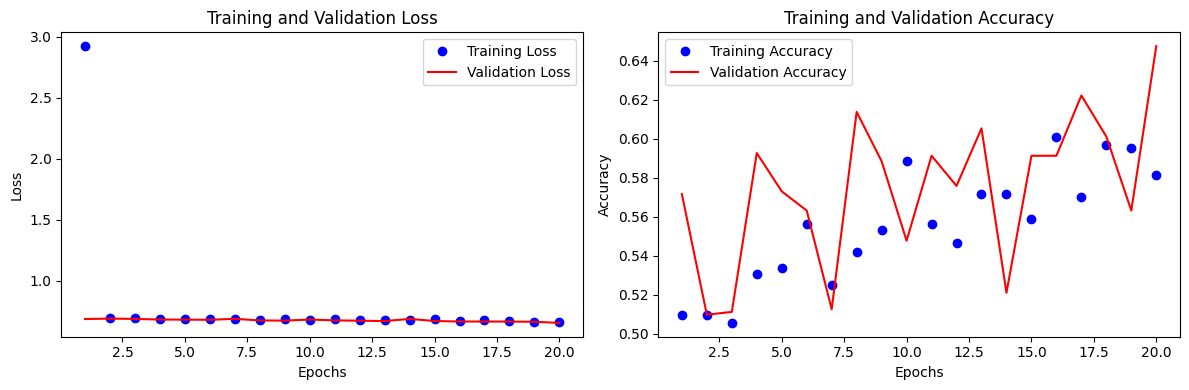

In [ ]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()